````{margin}
```{attributiongrey} Attribution
:class: attribution
This page originates from https://github.com/Tom-van-Woudenberg/BEP-Use-Cases.git, version: main
```
````



# Use Case 1: Point Loads

In [1]:
%pip install git+https://github.com/lfverlaan/sympy.git@telescope_hinge

  Cloning https://github.com/lfverlaan/sympy.git (to revision telescope_hinge) to c:\users\lucas\appdata\local\temp\pip-req-build-psw7uozs
  Resolved https://github.com/lfverlaan/sympy.git to commit 9b4d2066f1444a8ccc573286e3ae48cc85e32217
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/lfverlaan/sympy.git 'C:\Users\lucas\AppData\Local\Temp\pip-req-build-psw7uozs'
  Running command git checkout -b telescope_hinge --track origin/telescope_hinge
  branch 'telescope_hinge' set up to track 'origin/telescope_hinge'.
  Switched to a new branch 'telescope_hinge'


In [ ]:
# This is a workaround for the fact that micropip does not support git URLs, to make it work in the online book.
import micropip
await micropip.install('../packages/sympy-1.15.0.dev0-py3-none-any.whl')
#takes a while

In [ ]:
from sympy.physics.continuum_mechanics.column import Column
import matplotlib.pyplot as plt

In [3]:
length, E, A = 12, 40000, 0.5
c = Column(length, E, A)
c.apply_support(0)
c.apply_support(8)
c.apply_support(12)
c.apply_load(10, 3, -1)
c.apply_load(10, 11, -1)

In [4]:
c.applied_loads

[(10, 3, -1, None), (10, 11, -1, None)]

In [5]:
c.load

R_0*SingularityFunction(x, 0, -1) + R_12*SingularityFunction(x, 12, -1) + R_8*SingularityFunction(x, 8, -1) + 10*SingularityFunction(x, 3, -1) + 10*SingularityFunction(x, 11, -1)

In [6]:
c.solve_for_reaction_loads()
c.reaction_loads

{R_0: -25/4, R_8: -25/4, R_12: -15/2}

In [7]:
c.axial_force()

25*SingularityFunction(x, 0, 0)/4 - 10*SingularityFunction(x, 3, 0) + 25*SingularityFunction(x, 8, 0)/4 - 10*SingularityFunction(x, 11, 0) + 15*SingularityFunction(x, 12, 0)/2

In [8]:
c.deflection()

0.0003125*SingularityFunction(x, 0, 1) - 0.0005*SingularityFunction(x, 3, 1) + 0.0003125*SingularityFunction(x, 8, 1) - 0.0005*SingularityFunction(x, 11, 1) + 0.000375*SingularityFunction(x, 12, 1)

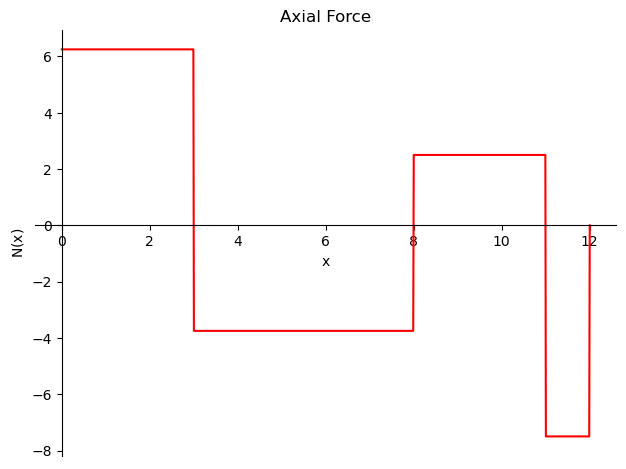

In [10]:
c.plot_axial_force();

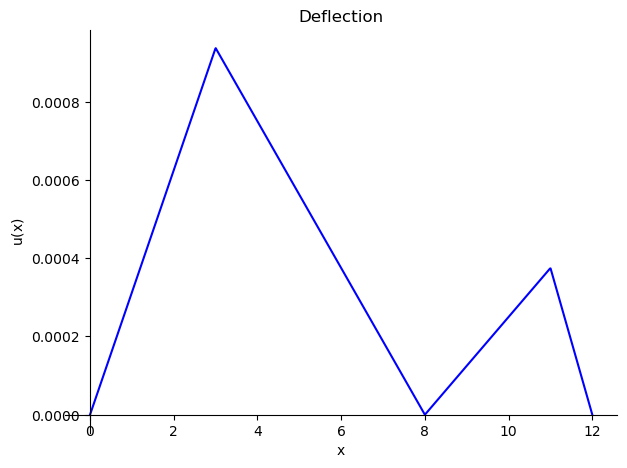

In [11]:
c.plot_deflection();